In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split

In [33]:
data=pd.read_csv("week2.csv")
x1=data.loc[:,"x1"]
x2=data.loc[:,"x2"]
y=data.loc[:,"y"]

X=np.column_stack([x1,x2])

In [35]:
#Splitting the data

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#training the model

model=linear_model.LogisticRegression()

model.fit(x_train,y_train)

#Prediction

y_pred=model.predict(x_test)

#Report of the model

accuracy=accuracy_score(y_test,y_pred)
report=classification_report(y_test,y_pred)
matrix=confusion_matrix(y_test,y_pred)

print(f"accuracy score is {accuracy}")
print("\n"+f"Classification Report is {report}")
print("\n"+f"Confusion matrix is {matrix}")

accuracy score is 0.79

Classification Report is               precision    recall  f1-score   support

          -1       0.85      0.88      0.87       156
           1       0.53      0.45      0.49        44

    accuracy                           0.79       200
   macro avg       0.69      0.67      0.68       200
weighted avg       0.78      0.79      0.78       200


Confusion matrix is [[138  18]
 [ 24  20]]


In [37]:
coef=model.coef_[0]
intercept=model.intercept_[0]

print(f"coefficient of the model is {coeff} and the intercept is {intercept}")

coefficient of the model is [0.00687234 3.51024968] and the intercept is -2.016173050067596


C:\Users\TIRTHANKAR KHAUND\AppData\Local\Temp\ipykernel_14772\867939082.py:6: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolors='k', marker='x', cmap=plt.cm.coolwarm, label='Test data')


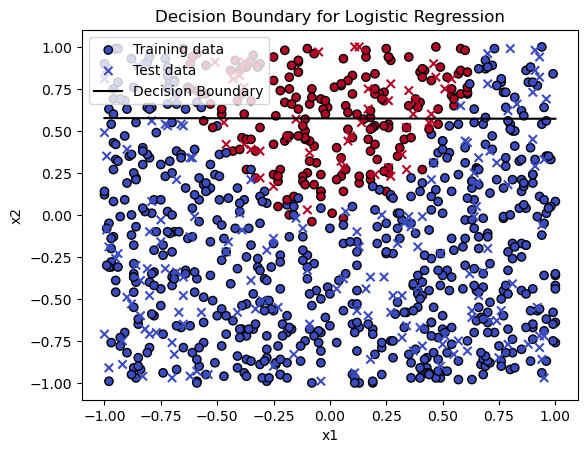

In [39]:
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)  # Generate 100 values for x1
y_vals = (-coef[0] * x_vals - intercept) / coef[1]  # Compute corresponding y2 values for the decision boundary

# Plotting the data points and decision boundary
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.coolwarm, label='Training data')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolors='k', marker='x', cmap=plt.cm.coolwarm, label='Test data')

# Plot the decision boundary
plt.plot(x_vals, y_vals, color='black', label='Decision Boundary')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary for Logistic Regression')
plt.legend()